In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [29]:
learning_rate = 1e-4
epsilon = 1e-4
reg = 0.001

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)


def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

x_image = tf.reshape(x, [-1, 28, 28, 1])

# x_norm = tf.

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

W1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024]))
b1 = tf.Variable(tf.zeros([1024]))

W2 = tf.Variable(tf.truncated_normal([1024, 10]))
b2 = tf.Variable(tf.zeros([10]))

conv1_out = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
maxpool1_out = max_pool_2x2(conv1_out)

conv2_out = tf.nn.relu(conv2d(maxpool1_out, W_conv2) + b_conv2)
maxpool2_out = max_pool_2x2(conv2_out)

maxpool2_flat = tf.reshape(maxpool2_out, [-1, 7*7*64])

l1_out = tf.nn.relu(tf.matmul(maxpool2_flat, W1) + b1)

l1_drop = tf.nn.dropout(l1_out, keep_prob)

l2_out = tf.matmul(l1_drop, W2) + b2

# pred = tf.nn.softmax(l2_out)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=l2_out))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(l2_out, 1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [35]:
num_steps = 20000
print_every = 100

# print "initial accuracy: ", acc

loss_history = []
validation_accuracy_history = []
training_accuracy_history = []

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1})

for step in range(num_steps):

    batch_xs, batch_ys = mnist.train.next_batch(50)

    run_loss, _ = sess.run([cross_entropy, train], { x: batch_xs, y:batch_ys, keep_prob: 0.75 })

    runv_acc = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1.0})
    runt_acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
    
    if step%print_every == 0:
        print "Iteration(",step,"/",num_steps,") loss: ", run_loss," train_accuracy: ",runt_acc," validation_accuracy: ",runv_acc
    
    loss_history.append(run_loss)
    validation_accuracy_history.append(runv_acc)
    training_accuracy_history.append(runt_acc)

print "complete"

Iteration( 0 / 20000 ) loss:  711.962  train_accuracy:  0.04  validation_accuracy:  0.1334
Iteration( 100 / 20000 ) loss:  125.446  train_accuracy:  0.68  validation_accuracy:  0.5304
Iteration( 200 / 20000 ) loss:  58.9581  train_accuracy:  0.62  validation_accuracy:  0.6804
Iteration( 300 / 20000 ) loss:  29.0818  train_accuracy:  0.78  validation_accuracy:  0.75
Iteration( 400 / 20000 ) loss:  30.206  train_accuracy:  0.66  validation_accuracy:  0.783
Iteration( 500 / 20000 ) loss:  13.4313  train_accuracy:  0.9  validation_accuracy:  0.7998
Iteration( 600 / 20000 ) loss:  10.5129  train_accuracy:  0.8  validation_accuracy:  0.8174
Iteration( 700 / 20000 ) loss:  10.4874  train_accuracy:  0.8  validation_accuracy:  0.8258
Iteration( 800 / 20000 ) loss:  8.00404  train_accuracy:  0.84  validation_accuracy:  0.8372
Iteration( 900 / 20000 ) loss:  6.72316  train_accuracy:  0.8  validation_accuracy:  0.847
Iteration( 1000 / 20000 ) loss:  14.9372  train_accuracy:  0.76  validation_accur

KeyboardInterrupt: 

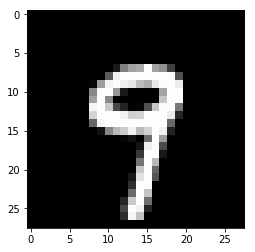

(1, 5, 5, 32, 64)


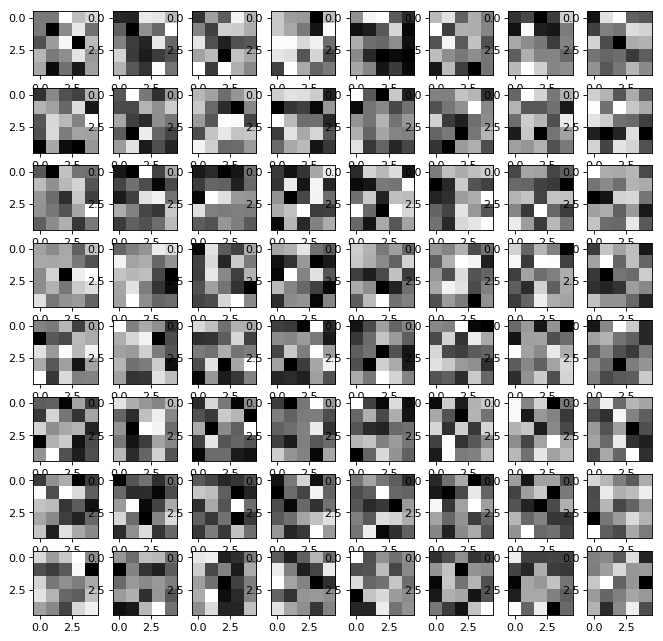

In [37]:
W1_final = np.array(sess.run([W_conv2]))

plt.imshow(mnist.train.images[0].reshape([28, 28]), cmap="gray")
plt.show()

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

print W1_final.shape

for i in range(W1_final.shape[4]):
    plt.subplot(8, 8, i+1)
    
    plt.imshow(W1_final[0, :, :, 0, i].reshape([5, 5]), cmap="gray")

plt.show()

ValueError: x and y must have same first dimension, but have shapes (20000,) and (7335,)

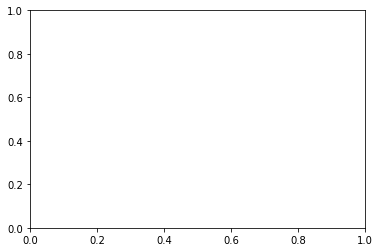

In [36]:
plt.plot(range(num_steps), loss_history)

plt.show()

plt.plot(range(num_steps), training_accuracy_history, color='b')
plt.plot(range(num_steps), validation_accuracy_history, color='r')

In [31]:
acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1})

print "accuracy: ",acc

accuracy:  0.835
